In [1]:
# Module 3 : Performance measurements of Logistic regression algorithms

In [2]:
#import library packages

In [3]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [4]:
#Load given dataset

In [5]:
data=p.read_csv(r"C:\Users\cshar\Downloads\Project\human.csv")

In [6]:
data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.925249         -0.674302         -0.894088  ...   
1            -0.968401         -0.945823         -0.894088  ...   
2            -0.970735         -0.963483         -0.939260  ...   
3            -0.974471         -0.968897         -0.938610  ...   
4            -0.965953         -0.977346         -0.938610  ...   
...                ...               ...               ...  ...   
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.705974                     0.006462   
1                           -0.594944                    -0.083495   
2                           -0.640736                    -0.034956   
3                           -0.736124                    -0.017067   
4                           -0.846595                    -0.002223   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.162920                         -0.825886   
1                                 0.017500                         -0.434375   
2                                 0.202302                          0.064103   
3                                 0.154438                          0.340134   
4                                -0.040046                          0.736715   
...                                    ...                               ...   
2942                              0.346295                

In [7]:
data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [8]:
data.tail()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
2942                              0.346295                          0.884904   
2943                             -0.372889                         -0.657421   
2944                              0.088574                          0.696663   
2945                             -0.819188                          0.929294   
2946                             -0.287951                          0.876030   

      angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
2942                             -0.698885             -0.651732   
2943                              0.322549             -0.655181   
2944                              0.363139             -0.655357   
2945                             -0.008398             -0.659719   
2946                             -0.024965             -0.660080   

      angle(Y,gravityMean)  angle(Z,gravityMean)  subject          Activity  
2942              0.274627              0.184784       24  WALKING_UPSTAIRS  
2943              0.273578              0.182412       24  WALKING_UPSTAIRS  
2944              0.274479              0.181184       24  WALKING_UPSTAIRS  
2945              0.264782              0.187563       24  WALKING_UPSTAIRS  
2946              0.263936              0.188103       24  WALKING_UPSTAIRS  

[5 rows x 563 columns]

In [9]:
# Shape of the data

In [10]:
data.shape

(2947, 563)

In [11]:
# Size of the data

In [12]:
data.size

1659161

In [13]:
# Checking datatype and information about dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [15]:
# To describe the dataframe

In [16]:
data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       2947.000000       2947.000000       2947.000000  ...   
mean          -0.522676         -0.637038         -0.462063  ...   
std            0.479899          0.357753          0.523916  ...   
min           -0.999914         -0.998899         -0.952357  ...   
25%           -0.974131         -0.975352         -0.934447  ...   
50%           -0.799907         -0.817005         -0.852659  ...   
75%           -0.133488         -0.322771         -0.009965  ...   
max            1.000000          0.427958          0.786436  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      2947.000000                      2947.000000   
mean                         -0.277593                        -0.598756   
std                           0.317245                         0.311042   
min                          -1.000000                        -1.000000   
25%                          -0.517494                        -0.829593   
50%                          -0.311023                        -0.683672   
75%                          -0.083559                        -0.458332   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  2947.000000                           2947.000000   
mean                      0.005264                              0.003799   
std                       0.336147                              0.445077   
min                      -1.000000                             -0.993402   
25%                      -0.130541                             -0.282600   
50%                       0.005188                              0.006767   
75%                       0.146200                              0.288113   
max                       0.998898                              0.986347   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       2947.000000                           2947.000000   
mean                           0.040029                             -0.017298   
std                            0.634989                              0.501311   
min                           -0.998898                             -0.991096   
25%                           -0.518924                             -0.428375   
50%                            0.047113                             -0.026726   
75%                            0.622151                              0.394387   
max                            1.000000                     

In [17]:
#Show columns

In [18]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [19]:
# Null values in the data

In [20]:
len(data.columns)

563

In [21]:
# Null values


In [22]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [23]:
# Check Duplicate Values

In [24]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2942    False
2943    False
2944    False
2945    False
2946    False
Length: 2947, dtype: bool

In [25]:
data.duplicated().sum()

0

In [26]:
# Drop duplivcate values

In [27]:
data.dropna()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.925249         -0.674302         -0.894088  ...   
1            -0.968401         -0.945823         -0.894088  ...   
2            -0.970735         -0.963483         -0.939260  ...   
3            -0.974471         -0.968897         -0.938610  ...   
4            -0.965953         -0.977346         -0.938610  ...   
...                ...               ...               ...  ...   
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.705974                     0.006462   
1                           -0.594944                    -0.083495   
2                           -0.640736                    -0.034956   
3                           -0.736124                    -0.017067   
4                           -0.846595                    -0.002223   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.162920                         -0.825886   
1                                 0.017500                         -0.434375   
2                                 0.202302                          0.064103   
3                                 0.154438                          0.340134   
4                                -0.040046                          0.736715   
...                                    ...                               ...   
2942                              0.346295                

In [28]:
# Correlation

In [29]:
data.corr()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.041274   
tBodyAcc-mean()-Y                              0.041274           1.000000   
tBodyAcc-mean()-Z                             -0.129645           0.225980   
tBodyAcc-std()-X                               0.016984          -0.054264   
tBodyAcc-std()-Y                              -0.001799          -0.059066   
...                                                 ...                ...   
angle(tBodyGyroJerkMean,gravityMean)           0.049701           0.092905   
angle(X,gravityMean)                          -0.058421          -0.017138   
angle(Y,gravityMean)                           0.034220          -0.030253   
angle(Z,gravityMean)                           0.038936          -0.027410   
subject                                        0.005077           0.003163   

                                      tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
tBodyAcc-mean()-X                             -0.129645          0.016984   
tBodyAcc-mean()-Y                              0.225980         -0.054264   
tBodyAcc-mean()-Z                              1.000000         -0.038578   
tBodyAcc-std()-X                              -0.038578          1.000000   
tBodyAcc-std()-Y                              -0.048340          0.910636   
...                                                 ...               ...   
angle(tBodyGyroJerkMean,gravityMean)          -0.021375         -0.033609   
angle(X,gravityMean)                          -0.013933         -0.382696   
angle(Y,gravityMean)                          -0.007318          0.401433   
angle(Z,gravityMean)                          -0.051057          0.388747   
subject                                        0.021476         -0.068487   

                                      tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X                            -0.001799         -0.008065   
tBodyAcc-mean()-Y                            -0.059066         -0.077051   
tBodyAcc-mean()-Z                            -0.048340         -0.042342   
tBodyAcc-std()-X                              0.910636          0.896031   
tBodyAcc-std()-Y                              1.000000          0.874501   
...                                                ...               ...   
angle(tBodyGyroJerkMean,gravityMean)         -0.018611         -0.029401   
angle(X,gravityMean)                         -0.383742         -0.383490   
angle(Y,gravityMean)                          0.467572          0.427469   
angle(Z,gravityMean)                          0.405681          0.488541   
subject                                      -0.036466         -0.028508   

                                      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
tBodyAcc-mean()-X                             0.022942         -0.002124   
tBodyAcc-mean()-Y                            -0.052501         -0.062012   
tBodyAcc-mean()-Z                            -0.037851         -0.049705   
tBodyAcc-std()-X                              0.998828          0.904884   
tBodyAcc-std()-Y                              0.909197          0.997942   
...                                                ...               ...   
angle(tBodyGyroJerkMean,gravityMean)         -0.033386         -0.015864   
angle(X,gravityMean)                         -0.381896         -0.380548   
angle(Y,gravityMean)                          0.397630          0.470157   
angle(Z,gravityMean)                          0.386152          0.406818   
subject                                      -0.064529         -0.036954   

                                      tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
tBodyAcc-mean()-X                            -0.010085          0.055897  ...   
tBodyAcc-mean()-Y                            -0.081834         -0.047736  ...   
tBodyAcc-mean()-Z                            -0.037628         -0.051682  ...   
tBodyAcc-std()-X          

In [30]:
# Unique Values in Activity Column

In [31]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [32]:
# Mapping Some Values to Others

In [33]:
data["label"]=data.Activity.map({"STANDING":"STANDING","SITTING":"SITTING","LAYING":"LAYING","WALKING":"WALKING",'WALKING_DOWNSTAIRS':"WALKING",'WALKING_UPSTAIRS':"WALKING"})

In [34]:
data.label.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING'], dtype=object)

In [35]:
data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.674302         -0.894088  ...                     0.006462   
1         -0.945823         -0.894088  ...                    -0.083495   
2         -0.963483         -0.939260  ...                    -0.034956   
3         -0.968897         -0.938610  ...                    -0.017067   
4         -0.977346         -0.938610  ...                    -0.002223   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.162920                         -0.825886   
1                              0.017500                         -0.434375   
2                              0.202302                          0.064103   
3                              0.154438                          0.340134   
4                             -0.040046                          0.736715   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.271151             -0.720009   
1                              0.920593             -0.698091   
2                              0.145068             -0.702771   
3                              0.296407             -0.698954   
4                             -0.118545             -0.692245   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity     label  
0              0.276801             -0.057978        2  STANDING  STANDING  
1              0.281343             -0.083898        2  STANDING  STANDING  
2              0.280083             -0.079346        2  STANDING  STANDING  
3              0.284114             -0.077108        2  STANDING  STANDING  
4              0.290722             -0.073857        2  STANDING  STANDING  

[5 rows x 564 columns]

In [36]:
# Delete Activity column from the data

In [37]:
del data['Activity']

In [38]:
data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       2947.000000       2947.000000       2947.000000  ...   
mean          -0.522676         -0.637038         -0.462063  ...   
std            0.479899          0.357753          0.523916  ...   
min           -0.999914         -0.998899         -0.952357  ...   
25%           -0.974131         -0.975352         -0.934447  ...   
50%           -0.799907         -0.817005         -0.852659  ...   
75%           -0.133488         -0.322771         -0.009965  ...   
max            1.000000          0.427958          0.786436  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      2947.000000                      2947.000000   
mean                         -0.277593                        -0.598756   
std                           0.317245                         0.311042   
min                          -1.000000                        -1.000000   
25%                          -0.517494                        -0.829593   
50%                          -0.311023                        -0.683672   
75%                          -0.083559                        -0.458332   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  2947.000000                           2947.000000   
mean                      0.005264                              0.003799   
std                       0.336147                              0.445077   
min                      -1.000000                             -0.993402   
25%                      -0.130541                             -0.282600   
50%                       0.005188                              0.006767   
75%                       0.146200                              0.288113   
max                       0.998898                              0.986347   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       2947.000000                           2947.000000   
mean                           0.040029                             -0.017298   
std                            0.634989                              0.501311   
min                           -0.998898                             -0.991096   
25%                           -0.518924                             -0.428375   
50%                            0.047113                             -0.026726   
75%                            0.622151                              0.394387   
max                            1.000000                     

In [39]:
# Categorical values using pandas to describe the label

In [40]:
p.Categorical(data['label']).describe()

counts     freqs
categories                  
LAYING         537  0.182219
SITTING        491  0.166610
STANDING       532  0.180523
WALKING       1387  0.470648

In [41]:
data["label"].value_counts()

WALKING     1387
LAYING       537
STANDING     532
SITTING      491
Name: label, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z',
       'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
       'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z',
       'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'label']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)

In [43]:
data.label.unique()

array([2, 1, 0, 3])

In [44]:
data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0                652                818               2900         -0.938404   
1               2160               2004                814         -0.975415   
2               1271                690                851         -0.993819   
3                942                478                880         -0.994743   
4               1194                617                528         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   label  
0      2  
1      2  
2      2  
3      2  
4      2  

[5 rows x 563 columns]

In [45]:
data["label"].unique()

array([2, 1, 0, 3])

In [46]:
# now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score
X = data.drop(labels='label', axis=1)

In [47]:
#Response variable
y = data.loc[:,'label']

In [48]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [49]:
#Logistic Regression

In [50]:
lr = LogisticRegression()

In [51]:
# Train the model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Predict the labels for the test data
y_pred = lr.predict(X_test)

In [53]:
# Create the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix result of Logistic Regression is:\n',confusion_matrix)


Confusion Matrix result of Logistic Regression is:
 [[157   1   2   1]
 [  1 130  15   1]
 [  0  16 133  11]
 [  0   0   8 409]]


In [54]:
x = (accuracy_score(y_test,y_pred)*100)
print('Accuracy result of Logistic Regression is:', x)

Accuracy result of Logistic Regression is: 93.67231638418079


In [55]:
# Create the classification report
print("")
print('Classification report of Logistic Regression Results:')
print("")

classification_report = classification_report(y_test, y_pred)
print(classification_report)


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       161
           1       0.88      0.88      0.88       147
           2       0.84      0.83      0.84       160
           3       0.97      0.98      0.97       417

    accuracy                           0.94       885
   macro avg       0.92      0.92      0.92       885
weighted avg       0.94      0.94      0.94       885



In [56]:
specificity_1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Specificity : ', specificity_1)

Specificity :  0.9936708860759493


In [57]:
sensitivity_1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Sensitivity : ', sensitivity_1)

Sensitivity :  0.9923664122137404


In [58]:
accuracy = cross_val_score(lr, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)

Cross validation test results of accuracy:
[0.89322034 0.7440678  0.96095076 0.94397284 0.91850594]


In [59]:
#get the mean of each fold 
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)

Accuracy result of Logistic Regression is: 89.2143535437829


In [60]:
LR=accuracy.mean() * 100

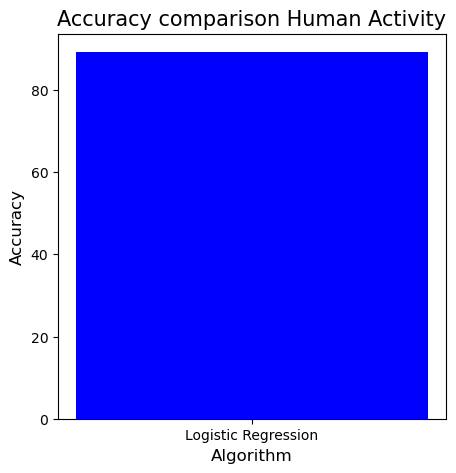

In [61]:
def graph():
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color="b")
    plt.title("Accuracy comparison Human Activity",fontsize=15)
    plt.xlabel("Algorithm",fontsize=12)
    plt.ylabel("Accuracy",fontsize=12)
graph()

In [62]:
cm2=confusion_matrix
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 130
True Negative : 1
False Positive : 1
False Negative : 157

True Positive Rate : 0.4529616724738676
True Negative Rate : 0.5
False Positive Rate : 0.5
False Negative Rate : 0.5470383275261324

Positive Predictive Value : 0.9923664122137404
Negative predictive value : 0.006329113924050633


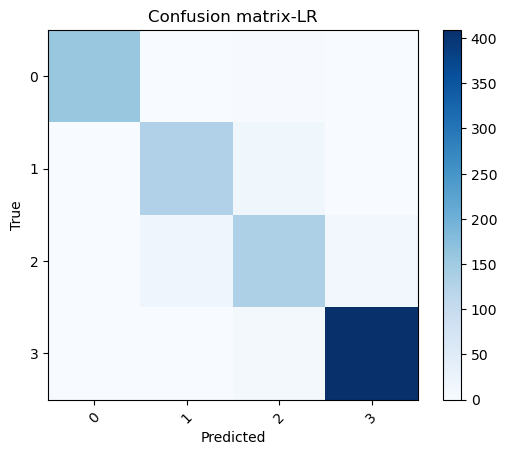

In [63]:
# Plot the confusion matrix
plt.imshow(confusion_matrix,cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix-LR')
plt.colorbar()
tick_marks = n.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

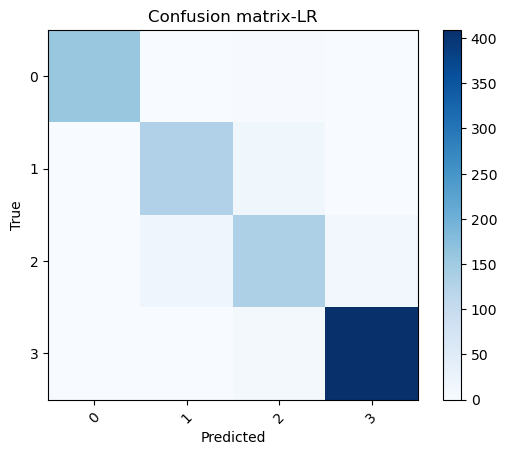

In [64]:
# Plot the confusion matrix
plt.imshow(confusion_matrix,cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix-LR')
plt.colorbar()
tick_marks = n.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()